# To Predict the Optimum Number of Cluster and Visualize 

## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Importing the Data

In [2]:
iris=pd.read_csv("C:/Users/ABHISHEK TRIPATHI/Downloads/Iris.csv")

## Data Preprocessing

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
categorical_features=["Species"]
continuous_features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [6]:
iris[continuous_features].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.shape

(150, 6)

### from above describe and info we can see that there is no null values or missing values 

In [9]:
for col in categorical_features:
    dummies=pd.get_dummies(iris[col],prefix=col)
    iris=pd.concat([iris,dummies],axis=1)
    iris.drop(col,axis=1,inplace=True)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [10]:
mms=MinMaxScaler()
mms.fit(iris)
iris_transformed=mms.transform(iris)

# Sum of Squared Distances of Samples

In [11]:
ss=[]#sum of square
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(iris_transformed)
    ss.append(km.inertia_)

### As k increases the sum of squared distance tends to zero . let we set k to its maximum value n each sample will form its own cluster meaning sum of squared distance is equal to zero. 

# Plotting the graph using Elbow Method

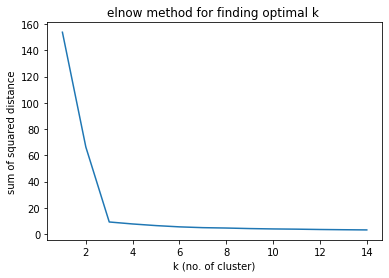

In [12]:
#plotting the graph using elbow method
plt.plot(K,ss)
plt.xlabel("k (no. of cluster)")
plt.ylabel('sum of squared distance')
plt.title('elnow method for finding optimal k ')
plt.show()

## Elbow is at the value 3 so the optimal number of cluster for the iris dataset is 3 .

# Applying KMeans Clustering

In [13]:
x=iris.iloc[:,[0,1,2,3]].values

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0)
y_kmeans=kmeans.fit_predict(x)

## Visualising the clusters on the first two columns

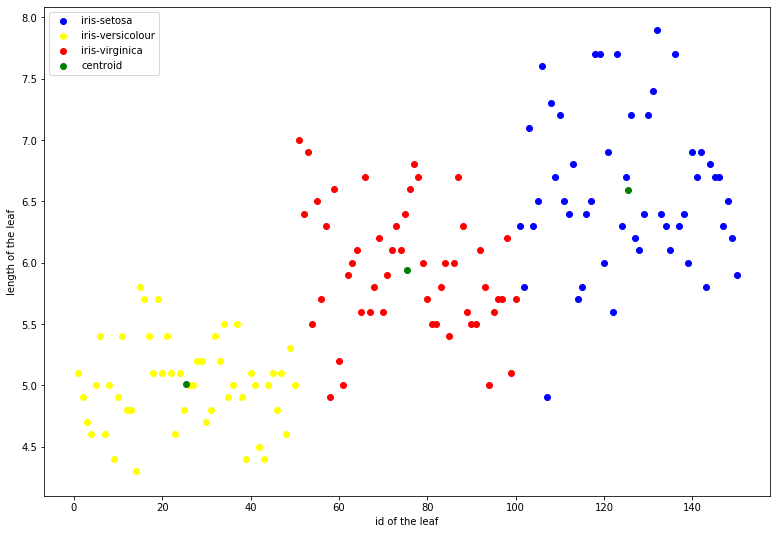

In [15]:
plt.figure(figsize=(13,9))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],color='blue',label="iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],color='yellow',label="iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],color='red',label="iris-virginica")
plt.xlabel('id of the leaf')
plt.ylabel("length of the leaf")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='green',label="centroid")
plt.legend()

# The Three Clusters and the Centroid is shown above